In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.graphics.gofplots import qqplot
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score,f1_score, make_scorer
from time import time
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import joblib
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB

# TomekLinks

# <font color =green> Logistic Regression</font>

In [ ]:
LogisticRegression().get_params()

# Original Features

In [3]:
train_features_tl_original_features= pd.read_csv(".../.../.../.../train_features_tl_original_features.csv")
train_labels_tl= pd.read_csv(".../.../.../.../train_labels_tl.csv")

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous'],
      dtype='object')
 Data distribution: 
y
0    25310
1     4513
dtype: int64



<AxesSubplot:xlabel='y', ylabel='count'>

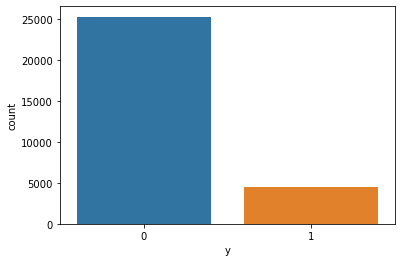

In [4]:
print(train_features_tl_original_features.columns)
print(f' Data distribution: \n{train_labels_tl.value_counts()}\n')
sns.countplot(train_labels_tl['y'])

In [ ]:
lR= LogisticRegression()

scoring ={"F1":"f1", "AUC":make_scorer(roc_auc_score)}
parameters={
    'penalty':['l1','l2'],# none: no penalty. l1 or l2: adding l1 or l2(default). elasticnet: adding both penalty l1 and l2
    'tol':[0.01,0.001,0.0001,0.00001], #tol: tolerance for stopping criteria
    'solver':['saga'],# solver: algorithm to use in optimization problem, default:lbfgs and its only work with l2 or none penalty. 
    # choice of algorithm depends on penalty saga: elastiicnet, li, l2, and none
    'max_iter':[300,400,500,600,700,1000]# max number of iteration needed for the solver to converge
    
}
cv=GridSearchCV(lR, parameters, cv=5, verbose=3,error_score='raise', scoring=scoring,refit="AUC")
cv.fit(train_features_tl_original_features,train_labels_tl.values.ravel())#ravel to convert to array gets error otherwise

In [6]:
cv.best_estimator_

LogisticRegression(max_iter=700, solver='saga', tol=0.001)

In [7]:
cv.best_score_

0.6084225166659812

In [8]:
# write our pickled model
joblib.dump(cv.best_estimator_,'.../.../.../.../mdl1_train_features_tl_original_features_LR.pkl')

['/Users/sarahalbadri/Desktop/Banking Dataset/partitioned dataset/TomekLinks/models/mdl1_train_features_tl_original_features_LR.pkl']

# Original Reduced

In [9]:
# Original Reduced
train_features_tl_original_reduced= pd.read_csv(" .../.../.../.../train_features_tl_original_reduced.csv")

train_labels_tl= pd.read_csv(".../.../.../.../TomekLinks/train_labels_tl.csv")




In [ ]:
lR= LogisticRegression()
scoring ={"F1":"f1", "AUC":make_scorer(roc_auc_score)}
parameters={
    'penalty':['l1','l2'],# none: no penalty. l1 or l2: adding l1 or l2(default). elasticnet: adding both penalty l1 and l2
    'tol':[0.01,0.001,0.0001,0.00001], #tol: tolerance for stopping criteria
    'solver':['saga'],# solver: algorithm to use in optimization problem, default:lbfgs and its only work with l2 or none penalty. 
    # choice of algorithm depends on penalty saga: elastiicnet, li, l2, and none
    'max_iter':[300,400,500,600,700,1000]# max number of iteration needed for the solver to converge
    
}
cv=GridSearchCV(lR, parameters, cv=5, verbose=3,error_score='raise', scoring=scoring,refit="AUC")
cv.fit(train_features_tl_original_reduced,train_labels_tl.values.ravel())#ravel to convert to array gets error otherwise

In [11]:
cv.best_estimator_

LogisticRegression(max_iter=700, solver='saga', tol=0.001)

In [12]:
cv.best_score_

0.6003537907369532

In [13]:
# write our pickled model
joblib.dump(cv.best_estimator_,'.../.../.../.../models/mdl2_train_features_tl_original_reduced_LR.pkl')

['/Users/sarahalbadri/Desktop/Banking Dataset/partitioned dataset/TomekLinks/models/mdl2_train_features_tl_original_reduced_LR.pkl']

# Clean Capped Features

In [14]:
# Clean Capped Features
train_features_tl_clean_capped_features = pd.read_csv(".../.../.../.../train_features_tl_clean_capped_features.csv")

train_labels_tl= pd.read_csv(".../.../.../.../train_labels_tl.csv")



In [ ]:
lR= LogisticRegression()
scoring ={"F1":"f1", "AUC":make_scorer(roc_auc_score)}
parameters={
    'penalty':['l1','l2'],# none: no penalty. l1 or l2: adding l1 or l2(default). elasticnet: adding both penalty l1 and l2
    'tol':[0.01,0.001,0.0001,0.00001], #tol: tolerance for stopping criteria
    'solver':['saga'],# solver: algorithm to use in optimization problem, default:lbfgs and its only work with l2 or none penalty. 
    # choice of algorithm depends on penalty saga: elastiicnet, li, l2, and none
    'max_iter':[300,400,500,600,700,1000]# max number of iteration needed for the solver to converge
    
}
cv=GridSearchCV(lR, parameters, cv=5, verbose=3,error_score='raise',scoring=scoring,refit="AUC")
cv.fit(train_features_tl_clean_capped_features,train_labels_tl.values.ravel())#ravel to convert to array gets error otherwise

In [16]:
cv.best_estimator_

LogisticRegression(max_iter=1000, penalty='l1', solver='saga', tol=0.01)

In [17]:
cv.best_score_

0.6166258204381281

In [18]:
# write our pickled model
joblib.dump(cv.best_estimator_,'.../.../.../.../mdl3_train_features_tl_clean_capped_features_LR.pkl')

['/Users/sarahalbadri/Desktop/Banking Dataset/partitioned dataset/TomekLinks/models/mdl3_train_features_tl_clean_capped_features_LR.pkl']

# clean transformed features

In [22]:
# clean transformed features

train_features_tl_clean_trans_features= pd.read_csv(".../.../.../.../feature selection/train_features_tl_clean_trans_features.csv")

train_labels_tl= pd.read_csv(".../.../.../.../TomekLinks/train_labels_tl.csv")

In [ ]:
lR= LogisticRegression()
scoring ={"F1":"f1", "AUC":make_scorer(roc_auc_score)}
parameters={
    'penalty':['l1','l2'],# l1 or l2: adding l1 or l2(default). 
    'tol':[0.01,0.001,0.0001,0.00001], #tol: tolerance for stopping criteria
    'solver':['saga'],# solver: algorithm to use in optimization problem, default:lbfgs and its only work with l2 or none penalty. 
    # choice of algorithm depends on penalty saga: elastiicnet, li, l2, and none
    'max_iter':[300,400,500,600,700,1000]# max number of iteration needed for the solver to converge
    
}
cv=GridSearchCV(lR, parameters, cv=5, verbose=3,error_score='raise',scoring=scoring,refit="AUC")
cv.fit(train_features_tl_clean_trans_features,train_labels_tl.values.ravel())#ravel to convert to array gets error otherwise

In [24]:
cv.best_estimator_

LogisticRegression(max_iter=1000, solver='saga', tol=0.001)

In [25]:
cv.best_score_

0.6084225166659812

In [26]:
# write our pickled model
joblib.dump(cv.best_estimator_,'.../.../.../.../TomekLinks/models/mdl4_train_features_tl_clean_trans_features_LR.pkl')

['/Users/sarahalbadri/Desktop/Banking Dataset/partitioned dataset/TomekLinks/models/mdl4_train_features_tl_clean_trans_features_LR.pkl']

# Clean Transformed Features Reduced 

In [36]:
# Clean Transformed Features Reduced
train_features_tl_clean_trans_features_reduced = pd.read_csv(".../.../.../.../TomekLinks/feature selection/train_features_tl_clean_trans_features_reduced.csv")
train_labels_tl= pd.read_csv(".../.../.../.../train_labels_tl.csv") 


In [ ]:
lR= LogisticRegression()
scoring ={"F1":"f1", "AUC":make_scorer(roc_auc_score)}
parameters={
    'penalty':['l1','l2'],# l1 or l2: adding l1 or l2(default). 
    'tol':[0.01,0.001,0.0001,0.00001], #tol: tolerance for stopping criteria
    'solver':['saga'],# solver: algorithm to use in optimization problem, default:lbfgs and its only work with l2 or none penalty. 
    # choice of algorithm depends on penalty saga: elastiicnet, li, l2, and none
    'max_iter':[300,400,500,600,700,1000]# max number of iteration needed for the solver to converge
    
}
cv=GridSearchCV(lR, parameters, cv=5, verbose=3,error_score='raise',scoring=scoring,refit="AUC")
cv.fit(train_features_tl_clean_trans_features_reduced,train_labels_tl.values.ravel())#ravel to convert to array gets error otherwise

In [38]:
cv.best_estimator_

LogisticRegression(max_iter=300, penalty='l1', solver='saga', tol=0.01)

In [39]:
cv.best_score_

0.5989306878020465

In [40]:
# write our pickled model
joblib.dump(cv.best_estimator_,'.../.../.../.../models/mdl5_train_features_tl_clean_trans_features_reduced_LR.pkl')

['/Users/sarahalbadri/Desktop/Banking Dataset/partitioned dataset/TomekLinks/models/mdl5_train_features_tl_clean_trans_features_reduced_LR.pkl']

# Clean Capped Transformed Features

In [32]:
# Clean Capped Transformed Features
train_features_tl_clean_cap_tran_features= pd.read_csv(".../.../.../.../feature selection/train_features_tl_clean_cap_tran_features.csv")
train_labels_tl= pd.read_csv(".../.../.../.../TomekLinks/train_labels_tl.csv")

In [ ]:
lR= LogisticRegression()
scoring ={"F1":"f1", "AUC":make_scorer(roc_auc_score)}
parameters={
    'penalty':['l1','l2'],# l1 or l2: adding l1 or l2(default). 
    'tol':[0.01,0.001,0.0001,0.00001], #tol: tolerance for stopping criteria
    'solver':['saga'],# solver: algorithm to use in optimization problem, default:lbfgs and its only work with l2 or none penalty. 
    # choice of algorithm depends on penalty saga: elastiicnet, li, l2, and none
    'max_iter':[300,400,500,600,700,1000]# max number of iteration needed for the solver to converge
    
}
cv=GridSearchCV(lR, parameters, cv=5, verbose=3,error_score='raise',scoring=scoring,refit="AUC")
cv.fit(train_features_tl_clean_cap_tran_features,train_labels_tl.values.ravel())#ravel to convert to array gets error otherwise

In [34]:
cv.best_estimator_

LogisticRegression(max_iter=300, solver='saga', tol=0.001)

In [35]:
cv.best_score_

0.6152092365448227

In [36]:
# write our pickled model
joblib.dump(cv.best_estimator_,'.../.../.../.../models/mdl6_train_features_tl_clean_cap_tran_features_LR.pkl')

['/Users/sarahalbadri/Desktop/Banking Dataset/partitioned dataset/TomekLinks/models/mdl6_train_features_tl_clean_cap_tran_features_LR.pkl']

# Clean Cap Trans Features Reduced

In [37]:
# Clean Cap Trans Features Reduced
train_features_tl_clean_cap_tran_features_reduced= pd.read_csv(".../.../.../.../TomekLinks/feature selection/train_features_tl_clean_cap_tran_features_reduced.csv")
train_labels_tl= pd.read_csv(".../.../.../.../TomekLinks/train_labels_tl.csv")

In [ ]:
lR= LogisticRegression()
scoring ={"F1":"f1", "AUC":make_scorer(roc_auc_score)}
parameters={
    'penalty':['l1','l2'],#  l1 or l2: adding l1 or l2(default). 
    'tol':[0.01,0.001,0.0001,0.00001], #tol: tolerance for stopping criteria
    'solver':['saga'],# solver: algorithm to use in optimization problem, default:lbfgs and its only work with l2 or none penalty. 
    # choice of algorithm depends on penalty saga: elastiicnet, li, l2, and none
    'max_iter':[300,400,500,600,700,1000]# max number of iteration needed for the solver to converge
    
}
cv=GridSearchCV(lR, parameters, cv=5, verbose=3,error_score='raise',scoring=scoring,refit="AUC")
cv.fit(train_features_tl_clean_cap_tran_features_reduced,train_labels_tl.values.ravel())#ravel to convert to array gets error otherwise

In [39]:
cv.best_estimator_

LogisticRegression(max_iter=400, solver='saga', tol=0.01)

In [40]:
cv.best_score_

0.6042505135954196

In [41]:
# write our pickled model
joblib.dump(cv.best_estimator_,'.../.../.../.../models/mdl7_train_features_tl_clean_cap_tran_features_reduced_LR.pkl')

['/Users/sarahalbadri/Desktop/Banking Dataset/partitioned dataset/TomekLinks/models/mdl7_train_features_tl_clean_cap_tran_features_reduced_LR.pkl']

# <font color =Green> Support Vector machine

In [ ]:
SVC().get_params()

# Original Features

In [43]:
train_features_tl_original_features= pd.read_csv(".../.../.../.../feature selection/train_features_tl_original_features.csv")
train_labels_tl= pd.read_csv(".../.../.../.../TomekLinks/train_labels_tl.csv")

In [ ]:
SVM= SVC()
scoring ={"F1":"f1", "AUC":make_scorer(roc_auc_score)}
parameters={
    'tol':[0.1,0.01,0.001,0.0001],#tolarance for stopping criteria
    'C':[0.1,1,10]# regularization parameters. Strength of regularization is inverslyt propotional to c
    
}

cv=GridSearchCV(SVM, parameters, cv=5, verbose=3, error_score='raise', scoring=scoring,refit="AUC")
cv.fit(train_features_tl_original_features,train_labels_tl.values.ravel())#ravel to convert to array gets error otherwise

In [45]:
cv.best_estimator_

SVC(C=10, tol=0.01)

In [46]:
cv.best_score_

0.5847162580436742

In [47]:
# write our pickled model
joblib.dump(cv.best_estimator_,'.../.../.../.../models/mdl8_train_features_tl_original_features_SVM.pkl')

['/Users/sarahalbadri/Desktop/Banking Dataset/partitioned dataset/TomekLinks/models/mdl8_train_features_tl_original_features_SVM.pkl']

# Original Reduced

In [50]:
train_features_tl_original_reduced= pd.read_csv(" .../.../.../.../feature selection/train_features_tl_original_reduced.csv")
train_labels_tl= pd.read_csv(".../.../.../.../TomekLinks/train_labels_tl.csv")

In [ ]:
SVM= SVC()
scoring ={"F1":"f1", "AUC":make_scorer(roc_auc_score)}
parameters={
    'tol':[0.1,0.01,0.001,0.0001],#tolarance for stopping criteria
    'C':[0.1,1,10]# regularization parameters. Strength of regularization is inverslyt propotional to c
    
}

cv=GridSearchCV(SVM, parameters, cv=5, verbose=3,error_score='raise', scoring=scoring,refit="AUC")
cv.fit(train_features_tl_original_reduced,train_labels_tl.values.ravel())#ravel to convert to array gets error otherwise

In [52]:
cv.best_estimator_

SVC(C=1)

In [53]:
cv.best_score_

0.561371743145564

In [54]:
# write our pickled model
joblib.dump(cv.best_estimator_,'.../.../.../.../models/mdl9_train_features_tl_original_reduced_SVM.pkl')

['/Users/sarahalbadri/Desktop/Banking Dataset/partitioned dataset/TomekLinks/models/mdl9_train_features_tl_original_reduced_SVM.pkl']

# Clean Capped Features

In [55]:
train_features_tl_clean_capped_features = pd.read_csv(".../.../.../.../TomekLinks/feature selection/train_features_tl_clean_capped_features.csv")
train_labels_tl= pd.read_csv(".../.../.../.../TomekLinks/train_labels_tl.csv")


In [ ]:
SVM= SVC()
scoring ={"F1":"f1", "AUC":make_scorer(roc_auc_score)}
parameters={
    'tol':[0.1,0.01,0.001,0.0001],#tolarance for stopping criteria
    'C':[0.1,1,10]# regularization parameters. Strength of regularization is inverslyt propotional to c
    
}

cv=GridSearchCV(SVM, parameters, cv=5, verbose=3,error_score='raise', scoring=scoring,refit="AUC")
cv.fit(train_features_tl_clean_capped_features,train_labels_tl.values.ravel())#ravel to convert to array gets error otherwise

In [57]:
cv.best_estimator_

SVC(C=10, tol=0.0001)

In [58]:
cv.best_score_

0.6176640675651244

In [59]:
# write our pickled model
joblib.dump(cv.best_estimator_,'.../.../.../.../TomekLinks/models/mdl10_train_features_tl_clean_capped_features_SVM.pkl')

['/Users/sarahalbadri/Desktop/Banking Dataset/partitioned dataset/TomekLinks/models/mdl10_train_features_tl_clean_capped_features_SVM.pkl']

# clean transformed features

In [61]:
train_features_tl_clean_trans_features= pd.read_csv(".../.../.../.../TomekLinks/feature selection/train_features_tl_clean_trans_features.csv")
train_labels_tl= pd.read_csv(".../.../.../.../TomekLinks/train_labels_tl.csv") 

In [ ]:
SVM= SVC()
scoring ={"F1":"f1", "AUC":make_scorer(roc_auc_score)}
parameters={
    'tol':[0.1,0.01,0.001,0.0001],#tolarance for stopping criteria
    'C':[0.1,1,10]# regularization parameters. Strength of regularization is inverslyt propotional to c
    
}

cv=GridSearchCV(SVM, parameters, cv=5, verbose=3,error_score='raise', scoring=scoring,refit="AUC")
cv.fit(train_features_tl_clean_trans_features,train_labels_tl.values.ravel())#ravel to convert to array gets error otherwise

In [63]:
cv.best_estimator_

SVC(C=10, tol=0.01)

In [64]:
cv.best_score_

0.5847162580436742

In [65]:
# write our pickled model
joblib.dump(cv.best_estimator_,'.../.../.../.../mdl11_train_features_tl_clean_trans_features_SVM.pkl')

['/Users/sarahalbadri/Desktop/Banking Dataset/partitioned dataset/TomekLinks/models/mdl11_train_features_tl_clean_trans_features_SVM.pkl']

# Clean Transformed Features Reduced

In [66]:
train_features_tl_clean_trans_features_reduced = pd.read_csv(".../.../.../.../feature selection/train_features_tl_clean_trans_features_reduced.csv")
train_labels_tl= pd.read_csv(".../.../.../.../TomekLinks/train_labels_tl.csv")

In [ ]:
SVM= SVC()
scoring ={"F1":"f1", "AUC":make_scorer(roc_auc_score)}
parameters={
    'tol':[0.1,0.01,0.001,0.0001],#tolarance for stopping criteria
    'C':[0.1,1,10]# regularization parameters. Strength of regularization is inverslyt propotional to c
    
}

cv=GridSearchCV(SVM, parameters, cv=5, verbose=3,error_score='raise', scoring=scoring,refit="AUC")
cv.fit(train_features_tl_clean_trans_features_reduced,train_labels_tl.values.ravel())#ravel to convert to array gets error otherwise

In [68]:
cv.best_estimator_

SVC(C=10)

In [69]:
cv.best_score_

0.5782900469718021

In [70]:
# write our pickled model
joblib.dump(cv.best_estimator_,'.../.../.../.../TomekLinks/models/mdl12_train_features_tl_clean_trans_features_reduced_SVM.pkl')

['/Users/sarahalbadri/Desktop/Banking Dataset/partitioned dataset/TomekLinks/models/mdl12_train_features_tl_clean_trans_features_reduced_SVM.pkl']

# Clean Capped Transformed Features

In [71]:
train_features_tl_clean_cap_tran_features= pd.read_csv(" .../.../.../.../feature selection/train_features_tl_clean_cap_tran_features.csv")
train_labels_tl= pd.read_csv(".../.../.../.../TomekLinks/train_labels_tl.csv")

In [ ]:
SVM= SVC()
scoring ={"F1":"f1", "AUC":make_scorer(roc_auc_score)}
parameters={
    'tol':[0.1,0.01,0.001,0.0001],#tolarance for stopping criteria
    'C':[0.1,1,10]# regularization parameters. Strength of regularization is inverslyt propotional to c
    
}

cv=GridSearchCV(SVM, parameters, cv=5, verbose=3,error_score='raise', scoring=scoring,refit="AUC")
cv.fit(train_features_tl_clean_cap_tran_features,train_labels_tl.values.ravel())#ravel to convert to array gets error otherwise

In [73]:
cv.best_estimator_

SVC(C=1, tol=0.01)

In [74]:
cv.best_score_

0.5887241273817441

In [75]:
# write our pickled model
joblib.dump(cv.best_estimator_,'.../.../.../.../TomekLinks/models/mdl13_train_features_tl_clean_cap_tran_features_SVM.pkl')

['/Users/sarahalbadri/Desktop/Banking Dataset/partitioned dataset/TomekLinks/models/mdl13_train_features_tl_clean_cap_tran_features_SVM.pkl']

# Clean Cap Trans Features Reduced

In [76]:
train_features_tl_clean_cap_tran_features_reduced = pd.read_csv(".../.../.../.../feature selection/train_features_tl_clean_cap_tran_features_reduced.csv")
train_labels_tl= pd.read_csv(".../.../.../.../TomekLinks/train_labels_tl.csv")

In [ ]:
from sklearn.metrics import make_scorer
SVM= SVC()
scoring ={"F1":"f1", "AUC":make_scorer(roc_auc_score)}
parameters={
    'tol':[0.1,0.01,0.001,0.0001],#tolarance for stopping criteria
    'C':[0.1,1,10]# regularization parameters. Strength of regularization is inversly propotional to c
    
}

cv=GridSearchCV(SVM, parameters, cv=5, verbose=3, error_score='raise',scoring=scoring, refit="AUC")#,return_train_score=True
cv.fit(train_features_tl_clean_cap_tran_features_reduced,train_labels_tl.values.ravel())#ravel to convert to array gets error otherwise

In [78]:
cv.best_estimator_

SVC(C=10)

In [79]:
cv.best_score_

0.5824705924505842

In [80]:
# write our pickled model
joblib.dump(cv.best_estimator_,'.../.../.../.../TomekLinks/models/mdl14_train_features_tl_clean_cap_tran_features_reduced_SVM.pkl')

['/Users/sarahalbadri/Desktop/Banking Dataset/partitioned dataset/TomekLinks/models/mdl14_train_features_tl_clean_cap_tran_features_reduced_SVM.pkl']

# <font color=green> Decision Tree

In [ ]:
DecisionTreeClassifier().get_params()

# Original Features

In [82]:
# Original Features
train_features_tl_original_features= pd.read_csv(".../.../.../.../TomekLinks/feature selection/train_features_tl_original_features.csv")
train_labels_tl= pd.read_csv(".../.../.../.../TomekLinks/train_labels_tl.csv") 

In [ ]:
DT= DecisionTreeClassifier()
scoring ={"F1":"f1", "AUC":make_scorer(roc_auc_score)}

parameters={
    'max_depth':[5,10,15,30,50,None]# maximum depth of the tree. none: tree goes as deep untill all leaves are pure or until all leaves contain less than min_samples_split samples.

}
cv=GridSearchCV(DT, parameters, cv=5, verbose=3,error_score='raise',scoring=scoring,refit="AUC")
cv.fit(train_features_tl_original_features,train_labels_tl.values.ravel())#ravel to convert to array gets error otherwise

In [84]:
cv.best_estimator_

DecisionTreeClassifier(max_depth=5)

In [85]:
cv.best_score_

0.5432053976645792

In [86]:
# write our pickled model
joblib.dump(cv.best_estimator_,'.../.../.../.../TomekLinks/models/mdl15_train_features_tl_original_features_DT.pkl')

['/Users/sarahalbadri/Desktop/Banking Dataset/partitioned dataset/TomekLinks/models/mdl15_train_features_tl_original_features_DT.pkl']

# Original Reduced

In [87]:
# Original Reduced
train_features_tl_original_reduced= pd.read_csv(".../.../.../.../TomekLinks/feature selection/train_features_tl_original_reduced.csv")
train_labels_tl= pd.read_csv(".../.../.../.../TomekLinks/train_labels_tl.csv")



In [ ]:
DT= DecisionTreeClassifier()
scoring ={"F1":"f1", "AUC":make_scorer(roc_auc_score)}

parameters={
    'max_depth':[5,10,15,30,50,None]# maximum depth of the tree. none: tree goes as deep untill all leaves are pure or until all leaves contain less than min_samples_split samples.

}
cv=GridSearchCV(DT, parameters, cv=5, verbose=3,error_score='raise',scoring=scoring,refit="AUC")
cv.fit(train_features_tl_original_reduced,train_labels_tl.values.ravel())#ravel to convert to array gets error otherwise

In [89]:
cv.best_estimator_

DecisionTreeClassifier(max_depth=10)

In [90]:
cv.best_score_

0.4841994440198715

In [91]:
# write our pickled model
joblib.dump(cv.best_estimator_,'.../.../.../.../TomekLinks/models/mdl16_train_features_tl_original_reduced_DT.pkl')

['/Users/sarahalbadri/Desktop/Banking Dataset/partitioned dataset/TomekLinks/models/mdl16_train_features_tl_original_reduced_DT.pkl']

# Clean Capped Features

In [92]:
# Clean Capped Features
train_features_tl_clean_capped_features = pd.read_csv(" .../.../.../.../TomekLinks/feature selection/train_features_tl_clean_capped_features.csv")
train_labels_tl= pd.read_csv(".../.../.../.../TomekLinks/train_labels_tl.csv")

In [ ]:
DT= DecisionTreeClassifier()
scoring ={"F1":"f1", "AUC":make_scorer(roc_auc_score)}

parameters={
    'max_depth':[5,10,15,30,50,None]# maximum depth of the tree. none: tree goes as deep untill all leaves are pure or until all leaves contain less than min_samples_split samples.

}
cv=GridSearchCV(DT, parameters, cv=5, verbose=3,error_score='raise',scoring=scoring,refit="AUC")
cv.fit(train_features_tl_clean_capped_features,train_labels_tl.values.ravel())#ravel to convert to array gets error otherwise

In [94]:
cv.best_estimator_

DecisionTreeClassifier(max_depth=5)

In [95]:
cv.best_score_

0.6396218798511144

In [96]:
# write our pickled model
joblib.dump(cv.best_estimator_,'.../.../.../.../TomekLinks/models/mdl17_train_features_tl_clean_capped_features_DT.pkl')

['/Users/sarahalbadri/Desktop/Banking Dataset/partitioned dataset/TomekLinks/models/mdl17_train_features_tl_clean_capped_features_DT.pkl']

# clean transformed features

In [99]:
train_features_tl_clean_trans_features= pd.read_csv(".../.../.../.../TomekLinks/feature selection/train_features_tl_clean_trans_features.csv")
train_labels_tl= pd.read_csv(".../.../.../.../TomekLinks/train_labels_tl.csv")

In [ ]:
DT= DecisionTreeClassifier()
scoring ={"F1":"f1", "AUC":make_scorer(roc_auc_score)}

parameters={
    'max_depth':[5,10,15,30,50,None]# maximum depth of the tree. none: tree goes as deep untill all leaves are pure or until all leaves contain less than min_samples_split samples.

}
cv=GridSearchCV(DT, parameters, cv=5, verbose=3,error_score='raise',scoring=scoring,refit="AUC")
cv.fit(train_features_tl_clean_trans_features,train_labels_tl.values.ravel())#ravel to convert to array gets error otherwise

In [101]:
cv.best_estimator_

DecisionTreeClassifier(max_depth=5)

In [102]:
cv.best_score_

0.5444235593478571

In [103]:
# write our pickled model
joblib.dump(cv.best_estimator_,'.../.../.../.../TomekLinks/models/mdl18_train_features_tl_clean_trans_features_DT.pkl')

['/Users/sarahalbadri/Desktop/Banking Dataset/partitioned dataset/TomekLinks/models/mdl18_train_features_tl_clean_trans_features_DT.pkl']

# Clean Transformed Features Reduced

In [104]:
train_features_tl_clean_trans_features_reduced = pd.read_csv(".../.../.../.../train_features_tl_clean_trans_features_reduced.csv")
train_labels_tl= pd.read_csv("/TomekLinks/train_labels_tl.csv")

In [ ]:
DT= DecisionTreeClassifier()
scoring ={"F1":"f1", "AUC":make_scorer(roc_auc_score)}

parameters={
    'max_depth':[5,10,15,30,50,None]# maximum depth of the tree. none: tree goes as deep untill all leaves are pure or until all leaves contain less than min_samples_split samples.

}
cv=GridSearchCV(DT, parameters, cv=5, verbose=3,error_score='raise',scoring=scoring,refit="AUC")
cv.fit(train_features_tl_clean_trans_features_reduced,train_labels_tl.values.ravel())#ravel to convert to array gets error otherwise

In [106]:
cv.best_estimator_

DecisionTreeClassifier()

In [107]:
cv.best_score_

0.6126747580201328

In [108]:
# write our pickled model
joblib.dump(cv.best_estimator_,'.../.../.../.../TomekLinks/models/mdl19_train_features_tl_clean_trans_features_reduced_DT.pkl')

['/Users/sarahalbadri/Desktop/Banking Dataset/partitioned dataset/TomekLinks/models/mdl19_train_features_tl_clean_trans_features_reduced_DT.pkl']

# Clean Capped Transformed Features

In [109]:
train_features_tl_clean_cap_tran_features= pd.read_csv(".../.../.../.../TomekLinks/feature selection/train_features_tl_clean_cap_tran_features.csv")
train_labels_tl= pd.read_csv(".../.../.../.../TomekLinks/train_labels_tl.csv")

In [ ]:
DT= DecisionTreeClassifier()
scoring ={"F1":"f1", "AUC":make_scorer(roc_auc_score)}

parameters={
    'max_depth':[5,10,15,30,50,None]# maximum depth of the tree. none: tree goes as deep untill all leaves are pure or until all leaves contain less than min_samples_split samples.

}
cv=GridSearchCV(DT, parameters, cv=5, verbose=3,error_score='raise',scoring=scoring,refit="AUC")
cv.fit(train_features_tl_clean_cap_tran_features,train_labels_tl.values.ravel())#ravel to convert to array gets error otherwise

In [111]:
cv.best_estimator_

DecisionTreeClassifier(max_depth=5)

In [112]:
cv.best_score_

0.5444038043103225

In [113]:
# write our pickled model
joblib.dump(cv.best_estimator_,'.../.../.../.../TomekLinks/models/mdl20_train_features_tl_clean_cap_tran_features_DT.pkl')

['/Users/sarahalbadri/Desktop/Banking Dataset/partitioned dataset/TomekLinks/models/mdl20_train_features_tl_clean_cap_tran_features_DT.pkl']

# Clean Cap Trans Features Reduced

In [114]:
train_features_tl_clean_cap_tran_features_reduced=pd.read_csv(".../.../.../.../TomekLinks/feature selection/train_features_tl_clean_cap_tran_features_reduced.csv")

train_labels_tl= pd.read_csv(".../.../.../.../TomekLinks/train_labels_tl.csv")

In [ ]:
DT= DecisionTreeClassifier()

scoring ={"F1":"f1", "AUC":make_scorer(roc_auc_score)}

parameters={
    'max_depth':[5,10,15,30,50,None]# maximum depth of the tree. none: tree goes as deep untill all leaves are pure or until all leaves contain less than min_samples_split samples.

}
cv=GridSearchCV(DT, parameters, cv=5, verbose=3,error_score='raise',scoring=scoring,refit="AUC")
cv.fit(train_features_tl_clean_cap_tran_features_reduced,train_labels_tl.values.ravel())#ravel to convert to array gets error otherwise

In [116]:
cv.best_estimator_

DecisionTreeClassifier(max_depth=30)

In [117]:
cv.best_score_

0.6061055316197732

In [118]:
# write our pickled model
joblib.dump(cv.best_estimator_,'.../.../.../.../TomekLinks/models/mdl21_train_features_tl_clean_cap_tran_features_reduced_DT.pkl')

['/Users/sarahalbadri/Desktop/Banking Dataset/partitioned dataset/TomekLinks/models/mdl21_train_features_tl_clean_cap_tran_features_reduced_DT.pkl']

# <font color =Green> Histogram Based Gradient Boosting

# Original Features



In [ ]:
HistGradientBoostingClassifier().get_params()

In [120]:
# Original Features
train_features_tl_original_features= pd.read_csv(".../.../.../.../TomekLinks/feature selection/train_features_tl_original_features.csv")
train_labels_tl= pd.read_csv(".../.../.../.../TomekLinks/train_labels_tl.csv")

In [ ]:
hgb = HistGradientBoostingClassifier()
scoring ={"F1":"f1", "AUC":make_scorer(roc_auc_score)}
parameters = {
    'max_iter': [100, 250, 500,700,1000,1500],
    'max_depth': [1, 3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 1]
}
cv = GridSearchCV(hgb, parameters, cv=5, verbose=3, scoring=scoring,refit="AUC")# set verbose to 3 to get detailed info 
cv.fit(train_features_tl_original_features, train_labels_tl.values.ravel())



In [122]:
cv.best_estimator_

HistGradientBoostingClassifier(learning_rate=1, max_depth=1, max_iter=500)

In [123]:
cv.best_score_

0.5586438876817199

In [124]:
joblib.dump(cv.best_estimator_,'.../.../.../.../partitioned dataset/TomekLinks/models/mdl22_train_features_tl_original_features_HGB.pkl')

['/Users/sarahalbadri/Desktop/Banking Dataset/partitioned dataset/TomekLinks/models/mdl22_train_features_tl_original_features_HGB.pkl']

# Original Reduced



In [125]:
# Original Reduced
train_features_tl_original_reduced= pd.read_csv(".../.../.../.../TomekLinks/feature selection/train_features_tl_original_reduced.csv")
train_labels_tl= pd.read_csv(".../.../.../.../TomekLinks/train_labels_tl.csv")

In [ ]:
hgb = HistGradientBoostingClassifier()
scoring ={"F1":"f1", "AUC":make_scorer(roc_auc_score)}
parameters = {
    'max_iter': [100, 250, 500,700,1000,1500],
    'max_depth': [1, 3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 1]
}
cv = GridSearchCV(hgb, parameters, cv=5, verbose=3, scoring=scoring,refit="AUC")# set verbose to 3 to get detailed info 
cv.fit(train_features_tl_original_reduced, train_labels_tl.values.ravel())



In [127]:
cv.best_estimator_

HistGradientBoostingClassifier(max_depth=1, max_iter=1000)

In [128]:
cv.best_score_

0.5286147327014483

In [129]:
joblib.dump(cv.best_estimator_,'.../.../.../.../TomekLinks/models/mdl23_train_features_tl_original_reduced_HGB.pkl')

['/Users/sarahalbadri/Desktop/Banking Dataset/partitioned dataset/TomekLinks/models/mdl23_train_features_tl_original_reduced_HGB.pkl']

# Clean Capped Features



In [130]:
# Clean Capped Features
train_features_tl_clean_capped_features = pd.read_csv(".../.../.../.../TomekLinks/feature selection/train_features_tl_clean_capped_features.csv")
train_labels_tl= pd.read_csv(".../.../.../.../TomekLinks/train_labels_tl.csv") 

In [ ]:
hgb = HistGradientBoostingClassifier()
scoring ={"F1":"f1", "AUC":make_scorer(roc_auc_score)}
parameters = {
    'max_iter': [100, 250, 500,700,1000,1500],
    'max_depth': [1, 3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 1]
}
cv = GridSearchCV(hgb, parameters, cv=5, verbose=3, scoring=scoring,refit="AUC")# set verbose to 3 to get detailed info 
cv.fit(train_features_tl_clean_capped_features, train_labels_tl.values.ravel())



In [132]:
cv.best_estimator_

HistGradientBoostingClassifier(learning_rate=1, max_depth=9, max_iter=250)

In [133]:
cv.best_score_

0.6349028083033507

In [134]:
joblib.dump(cv.best_estimator_,'.../.../.../.../TomekLinks/models/mdl24_train_features_tl_clean_capped_features_HGB.pkl')

['/Users/sarahalbadri/Desktop/Banking Dataset/partitioned dataset/TomekLinks/models/mdl24_train_features_tl_clean_capped_features_HGB.pkl']

# clean transformed features

In [136]:
# clean transformed features
train_features_tl_clean_trans_features= pd.read_csv(".../.../.../.../TomekLinks/feature selection/train_features_tl_clean_trans_features.csv")
train_labels_tl= pd.read_csv(".../.../.../.../TomekLinks/train_labels_tl.csv")

In [ ]:
hgb = HistGradientBoostingClassifier()
scoring ={"F1":"f1", "AUC":make_scorer(roc_auc_score)}
parameters = {
    'max_iter': [100, 250, 500,700,1000,1500],
    'max_depth': [1, 3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 1]
}
cv = GridSearchCV(hgb, parameters, cv=5, verbose=3, scoring=scoring,refit="AUC")# set verbose to 3 to get detailed info 
cv.fit(train_features_tl_clean_trans_features, train_labels_tl.values.ravel())



In [138]:
cv.best_estimator_

HistGradientBoostingClassifier(learning_rate=1, max_depth=1)

In [139]:
cv.best_score_

0.5587690525431455

In [140]:
joblib.dump(cv.best_estimator_,'.../.../.../.../TomekLinks/models/mdl25_train_features_tl_clean_trans_features_HGB.pkl')

['/Users/sarahalbadri/Desktop/Banking Dataset/partitioned dataset/TomekLinks/models/mdl25_train_features_tl_clean_trans_features_HGB.pkl']

# Clean Transformed Features Reduced¶

In [141]:
# Clean Transformed Features Reduced
train_features_tl_clean_trans_features_reduced = pd.read_csv(".../.../.../.../TomekLinks/feature selection/train_features_tl_clean_trans_features_reduced.csv")
train_labels_tl= pd.read_csv(".../.../.../.../TomekLinks/train_labels_tl.csv")

In [ ]:
hgb = HistGradientBoostingClassifier()
scoring ={"F1":"f1", "AUC":make_scorer(roc_auc_score)}
parameters = {
    'max_iter': [100, 250, 500,700,1000,1500],
    'max_depth': [1, 3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 1]
}
cv = GridSearchCV(hgb, parameters, cv=5, verbose=3, scoring=scoring,refit="AUC")# set verbose to 3 to get detailed info 
cv.fit(train_features_tl_clean_trans_features_reduced, train_labels_tl.values.ravel())



In [143]:
cv.best_estimator_

HistGradientBoostingClassifier(learning_rate=1, max_depth=1, max_iter=700)

In [144]:
cv.best_score_

0.6147019262127148

In [145]:
joblib.dump(cv.best_estimator_,'.../.../.../.../TomekLinks/models/mdl26_train_features_tl_clean_trans_features_reduced_HGB.pkl')

['/Users/sarahalbadri/Desktop/Banking Dataset/partitioned dataset/TomekLinks/models/mdl26_train_features_tl_clean_trans_features_reduced_HGB.pkl']

# Clean Capped Transformed Features

In [146]:
# Clean Capped Transformed Features

train_features_tl_clean_cap_tran_features= pd.read_csv(".../.../.../.../TomekLinks/feature selection/train_features_tl_clean_cap_tran_features.csv")
train_labels_tl= pd.read_csv(".../.../.../.../TomekLinks/train_labels_tl.csv")

In [ ]:
hgb = HistGradientBoostingClassifier()
scoring ={"F1":"f1", "AUC":make_scorer(roc_auc_score)}
parameters = {
    'max_iter': [100, 250, 500,700,1000,1500],
    'max_depth': [1, 3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 1]
}
cv = GridSearchCV(hgb, parameters, cv=5, verbose=3, scoring=scoring,refit="AUC")# set verbose to 3 to get detailed info 
cv.fit(train_features_tl_clean_cap_tran_features, train_labels_tl.values.ravel())



In [148]:
cv.best_estimator_

HistGradientBoostingClassifier(learning_rate=1, max_depth=1, max_iter=250)

In [149]:
cv.best_score_

0.559559716083439

In [150]:
joblib.dump(cv.best_estimator_,'.../.../.../.../models/mdl27_train_features_tl_clean_cap_tran_features_HGB.pkl')

['/Users/sarahalbadri/Desktop/Banking Dataset/partitioned dataset/TomekLinks/models/mdl27_train_features_tl_clean_cap_tran_features_HGB.pkl']

# Clean Cap Trans Features Reduced

In [151]:
# Clean Cap Trans Features Reduced
train_features_tl_clean_cap_tran_features_reduced= pd.read_csv(".../.../.../.../TomekLinks/feature selection/train_features_tl_clean_cap_tran_features_reduced.csv")
train_labels_tl= pd.read_csv(".../.../.../.../TomekLinks/train_labels_tl.csv")

In [ ]:
hgb = HistGradientBoostingClassifier()
scoring ={"F1":"f1", "AUC":make_scorer(roc_auc_score)}
parameters = {
    'max_iter': [100, 250, 500,700,1000,1500],
    'max_depth': [1, 3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 1]
}
cv = GridSearchCV(hgb, parameters, cv=5, verbose=3, scoring=scoring,refit="AUC")# set verbose to 3 to get detailed info 
cv.fit(train_features_tl_clean_cap_tran_features_reduced, train_labels_tl.values.ravel())



In [153]:
cv.best_estimator_

HistGradientBoostingClassifier(learning_rate=1, max_depth=1, max_iter=250)

In [154]:
cv.best_score_

0.6087632156698591

In [155]:
joblib.dump(cv.best_estimator_,'.../.../.../.../TomekLinks/models/mdl28_train_features_tl_clean_cap_tran_features_reduced_HGB.pkl')

['/Users/sarahalbadri/Desktop/Banking Dataset/partitioned dataset/TomekLinks/models/mdl28_train_features_tl_clean_cap_tran_features_reduced_HGB.pkl']

# <font color =Green> Random Forest

In [ ]:
RandomForestClassifier().get_params()

# Original Features

In [157]:
train_features_tl_original_features= pd.read_csv(".../.../.../.../train_features_tl_original_features.csv")
train_labels_tl= pd.read_csv(".../.../.../.../TomekLinks/train_labels_tl.csv")

In [ ]:
RF= RandomForestClassifier()
scoring ={"F1":"f1", "AUC":make_scorer(roc_auc_score)}
parameters={
    'n_estimators':[100,250,500],#number of trees in the forest(default =100)
    'max_depth':[7,10,None],# max depth of tree. none:nodes are expanding until all leaves are pure or contain less than min samples_split samples
    'bootstrap':[True,False],# whether bootstrap samples are used when building trees. false whole dataset is used to build each tree (default:true)
    'min_samples_split':[2,3,4]
}

cv=GridSearchCV(RF, parameters, cv=5, verbose=3,error_score='raise', scoring=scoring,refit="AUC")
cv.fit(train_features_tl_original_features,train_labels_tl.values.ravel())#ravel to convert to array gets error otherwise

In [159]:
cv.best_estimator_

RandomForestClassifier(min_samples_split=4, n_estimators=250)

In [160]:
cv.best_score_

0.5113140708908828

In [161]:
# write our pickled model
joblib.dump(cv.best_estimator_,'.../.../.../.../TomekLinks/models/mdl29_train_features_tl_original_features_RF.pkl')

['/Users/sarahalbadri/Desktop/Banking Dataset/partitioned dataset/TomekLinks/models/mdl29_train_features_tl_original_features_RF.pkl']

# Original Reduced

In [162]:
# Original Reduced
train_features_tl_original_reduced= pd.read_csv(".../.../.../.../TomekLinks/feature selection/train_features_tl_original_reduced.csv")
train_labels_tl= pd.read_csv(".../.../.../.../TomekLinks/train_labels_tl.csv")

In [ ]:
RF= RandomForestClassifier()
scoring ={"F1":"f1", "AUC":make_scorer(roc_auc_score)}
parameters={
    'n_estimators':[100,250,500],#number of trees in the forest(default =100)
    'max_depth':[7,10,None],# max depth of tree. none:nodes are expanding until all leaves are pure or contain less than min samples_split samples
    'bootstrap':[True,False],# whether bootstrap samples are used when building trees. false whole dataset is used to build each tree (default:true)
    'min_samples_split':[2,3,4]
}

cv=GridSearchCV(RF, parameters, cv=5, verbose=3,error_score='raise', scoring=scoring,refit="AUC")
cv.fit(train_features_tl_original_reduced,train_labels_tl.values.ravel())#ravel to convert to array gets error otherwise

In [164]:
cv.best_estimator_

RandomForestClassifier(bootstrap=False, min_samples_split=4, n_estimators=250)

In [165]:
cv.best_score_

0.48745039917702526

In [166]:
# write our pickled model
joblib.dump(cv.best_estimator_,'.../.../.../.../TomekLinks/models/mdl30_train_features_tl_original_reduced_RF.pkl')

['/Users/sarahalbadri/Desktop/Banking Dataset/partitioned dataset/TomekLinks/models/mdl30_train_features_tl_original_reduced_RF.pkl']

# Clean Capped Features

In [167]:
# Clean Capped Features
train_features_tl_clean_capped_features = pd.read_csv(".../.../.../.../TomekLinks/feature selection/train_features_tl_clean_capped_features.csv")
train_labels_tl= pd.read_csv(".../.../.../.../TomekLinks/train_labels_tl.csv")

In [ ]:
RF= RandomForestClassifier()
scoring ={"F1":"f1", "AUC":make_scorer(roc_auc_score)}
parameters={
    'n_estimators':[100,250,500],#number of trees in the forest(default =100)
    'max_depth':[7,10,None],# max depth of tree. none:nodes are expanding until all leaves are pure or contain less than min samples_split samples
    'bootstrap':[True,False],# whether bootstrap samples are used when building trees. false whole dataset is used to build each tree (default:true)
    'min_samples_split':[2,3,4]
}
cv=GridSearchCV(RF, parameters, cv=5, verbose=3,error_score='raise',scoring=scoring,refit="AUC")
cv.fit(train_features_tl_clean_capped_features,train_labels_tl.values.ravel())#ravel to convert to array gets error otherwise

In [169]:
cv.best_estimator_

RandomForestClassifier(bootstrap=False, n_estimators=500)

In [170]:
cv.best_score_

0.6298954556659414

In [171]:
# write our pickled model
joblib.dump(cv.best_estimator_,'.../.../.../.../TomekLinks/models/mdl31_train_features_tl_clean_capped_features_RF.pkl')

['/Users/sarahalbadri/Desktop/Banking Dataset/partitioned dataset/TomekLinks/models/mdl31_train_features_tl_clean_capped_features_RF.pkl']

# clean transformed features

In [173]:
# clean transformed features
train_features_tl_clean_trans_features= pd.read_csv(".../.../.../.../TomekLinks/feature selection/train_features_tl_clean_trans_features.csv")
train_labels_tl= pd.read_csv(".../.../.../.../TomekLinks/train_labels_tl.csv")

In [ ]:
RF= RandomForestClassifier()
scoring ={"F1":"f1", "AUC":make_scorer(roc_auc_score)}
parameters={
    'n_estimators':[100,250,500],#number of trees in the forest(default =100)
    'max_depth':[7,10,None],# max depth of tree. none:nodes are expanding until all leaves are pure or contain less than min samples_split samples
    'bootstrap':[True,False],# whether bootstrap samples are used when building trees. false whole dataset is used to build each tree (default:true)
    'min_samples_split':[2,3,4]
}

cv=GridSearchCV(RF, parameters, cv=5, verbose=3,error_score='raise', scoring=scoring,refit="AUC")
cv.fit(train_features_tl_clean_trans_features,train_labels_tl.values.ravel())#ravel to convert to array gets error otherwise

In [175]:
cv.best_estimator_

RandomForestClassifier(n_estimators=500)

In [176]:
cv.best_score_

0.510823190807965

In [177]:
# write our pickled model
joblib.dump(cv.best_estimator_,'.../.../.../.../TomekLinks/models/mdl32_train_features_tl_clean_trans_features_RF.pkl')

['/Users/sarahalbadri/Desktop/Banking Dataset/partitioned dataset/TomekLinks/models/mdl32_train_features_tl_clean_trans_features_RF.pkl']

# Clean Transformed Features Reduced

In [178]:
# Clean Transformed Features Reduced
train_features_tl_clean_trans_features_reduced = pd.read_csv(".../.../.../.../TomekLinks/feature selection/train_features_tl_clean_trans_features_reduced.csv")
train_labels_tl= pd.read_csv(".../.../.../.../partitioned dataset/TomekLinks/train_labels_tl.csv")

In [ ]:
RF= RandomForestClassifier()
scoring ={"F1":"f1", "AUC":make_scorer(roc_auc_score)}
parameters={
    'n_estimators':[100,250,500],#number of trees in the forest(default =100)
    'max_depth':[7,10,None],# max depth of tree. none:nodes are expanding until all leaves are pure or contain less than min samples_split samples
    'bootstrap':[True,False],# whether bootstrap samples are used when building trees. false whole dataset is used to build each tree (default:true)
    'min_samples_split':[2,3,4]
}

cv=GridSearchCV(RF, parameters, cv=5, verbose=3,error_score='raise', scoring=scoring,refit="AUC")
cv.fit(train_features_tl_clean_trans_features_reduced,train_labels_tl.values.ravel())#ravel to convert to array gets error otherwise

In [180]:
cv.best_estimator_

RandomForestClassifier(bootstrap=False)

In [181]:
cv.best_score_

0.6154822870371732

In [182]:
# write our pickled model
joblib.dump(cv.best_estimator_,'.../.../.../.../TomekLinks/models/mdl33_train_features_tl_clean_trans_features_reduced_RF.pkl')

['/Users/sarahalbadri/Desktop/Banking Dataset/partitioned dataset/TomekLinks/models/mdl33_train_features_tl_clean_trans_features_reduced_RF.pkl']

# Clean Capped Transformed Features

In [183]:
# Clean Capped Transformed Features
train_features_tl_clean_cap_tran_features= pd.read_csv(" .../.../.../.../TomekLinks/feature selection/train_features_tl_clean_cap_tran_features.csv")
train_labels_tl= pd.read_csv(".../.../.../.../TomekLinks/train_labels_tl.csv")

In [ ]:
RF= RandomForestClassifier()
scoring ={"F1":"f1", "AUC":make_scorer(roc_auc_score)}
parameters={
    'n_estimators':[100,250,500],#number of trees in the forest(default =100)
    'max_depth':[7,10,None],# max depth of tree. none:nodes are expanding until all leaves are pure or contain less than min samples_split samples
    'bootstrap':[True,False],# whether bootstrap samples are used when building trees. false whole dataset is used to build each tree (default:true)
    'min_samples_split':[2,3,4]
}

cv=GridSearchCV(RF, parameters, cv=5, verbose=3,error_score='raise', scoring=scoring,refit="AUC")
cv.fit(train_features_tl_clean_cap_tran_features,train_labels_tl.values.ravel())#ravel to convert to array gets error otherwise

In [185]:
cv.best_estimator_

RandomForestClassifier(min_samples_split=3)

In [186]:
cv.best_score_

0.5100417757586617

In [187]:
# write our pickled model
joblib.dump(cv.best_estimator_,'.../.../.../.../TomekLinks/models/mdl34_train_features_tl_clean_cap_tran_features_RF.pkl')

['/Users/sarahalbadri/Desktop/Banking Dataset/partitioned dataset/TomekLinks/models/mdl34_train_features_tl_clean_cap_tran_features_RF.pkl']

# Clean Cap Trans Features Reduced

In [188]:
# Clean Cap Trans Features Reduced
train_features_tl_clean_cap_tran_features_reduced= pd.read_csv(".../.../.../.../TomekLinks/feature selection/train_features_tl_clean_cap_tran_features_reduced.csv")
train_labels_tl= pd.read_csv(".../.../.../.../TomekLinks/train_labels_tl.csv")

In [ ]:
RF= RandomForestClassifier()
scoring ={"F1":"f1", "AUC":make_scorer(roc_auc_score)}
parameters={
    'n_estimators':[100,250,500],#number of trees in the forest(default =100)
    'max_depth':[7,10,None],# max depth of tree. none:nodes are expanding until all leaves are pure or contain less than min samples_split samples
    'bootstrap':[True,False],# whether bootstrap samples are used when building trees. false whole dataset is used to build each tree (default:true)
    'min_samples_split':[2,3,4]
}

cv=GridSearchCV(RF, parameters, cv=5, verbose=3,error_score='raise', scoring=scoring,refit="AUC")
cv.fit(train_features_tl_clean_cap_tran_features_reduced,train_labels_tl.values.ravel())#ravel to convert to array gets error otherwise

In [190]:
cv.best_estimator_

RandomForestClassifier(bootstrap=False, n_estimators=500)

In [191]:
cv.best_score_

0.615463166096504

In [192]:
# write our pickled model
joblib.dump(cv.best_estimator_,'.../.../.../.../Banking /TomekLinks/models/mdl35_train_features_tl_clean_cap_tran_features_reduced_RF.pkl')

['/Users/sarahalbadri/Desktop/Banking Dataset/partitioned dataset/TomekLinks/models/mdl35_train_features_tl_clean_cap_tran_features_reduced_RF.pkl']

# <font color =Green> Voting Classifier 

In [2]:
vc = VotingClassifier(
    estimators= [('lr', LogisticRegression()), ('rf',RandomForestClassifier()),('gnb',GaussianNB())],
    voting='soft'
                    )

In [ ]:
vc.get_params()

# Original Features

In [195]:
train_features_tl_original_features= pd.read_csv(".../.../.../.../TomekLinks/feature selection/train_features_tl_original_features.csv")
train_labels_tl= pd.read_csv(".../.../.../.../TomekLinks/train_labels_tl.csv")

In [ ]:
# Conduct search for best params while running cross-validation (GridSearchCV)
scoring ={"F1":"f1", "AUC":make_scorer(roc_auc_score)}

parameters = {
    'lr__C': [0.1, 1, 10],# parameter 1 to be tuned, default = 1
    #'lr__tol':[0.001,0.0001,0.00001],
    'lr__solver':['saga'],
    'lr__max_iter': [100,200,400,800],
    'rf__n_estimators': [100,200,400,500],
    'rf__bootstrap': [True, False]
    
}
    
cv = GridSearchCV(vc, parameters, cv=5, verbose=3, scoring=scoring,refit="AUC")# five fold cross validation
cv.fit(train_features_tl_original_features, train_labels_tl.values.ravel())#.ravel to convert to array gets error otherwise

In [197]:
cv.best_estimator_

VotingClassifier(estimators=[('lr', LogisticRegression(C=1, solver='saga')),
                             ('rf', RandomForestClassifier()),
                             ('gnb', GaussianNB())],
                 voting='soft')

In [198]:
cv.best_score_

0.633016454533276

In [199]:
# write our pickled model
joblib.dump(cv.best_estimator_,'.../.../.../.../TomekLinks/models/mdl36_train_features_tl_original_features_VC.pkl')

['/Users/sarahalbadri/Desktop/Banking Dataset/partitioned dataset/TomekLinks/models/mdl36_train_features_tl_original_features_VC.pkl']

# Original Reduced

In [4]:
train_features_tl_original_reduced= pd.read_csv(".../.../.../.../TomekLinks/feature selection/train_features_tl_original_reduced.csv")
train_labels_tl= pd.read_csv(".../.../.../.../TomekLinks/train_labels_tl.csv")

In [ ]:
scoring ={"F1":"f1","AUC":make_scorer(roc_auc_score)}
parameters = {
    'lr__C': [0.1, 1, 10],# parameter 1 to be tuned, default = 1
    #'lr__tol':[0.001,0.0001,0.00001],
    'lr__solver':['saga'],
    'lr__max_iter': [100,200,400,800],
    'rf__n_estimators': [100,200,400,500],
    'rf__bootstrap': [True, False]
}
cv = GridSearchCV(vc, parameters, cv=5, verbose=3, scoring=scoring,refit="AUC")# five fold cross validation
cv.fit(train_features_tl_original_reduced, train_labels_tl.values.ravel())#.ravel to convert to array gets error otherwise

In [6]:
cv.best_estimator_

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=10, max_iter=200,
                                                 solver='saga')),
                             ('rf', RandomForestClassifier()),
                             ('gnb', GaussianNB())],
                 voting='soft')

In [7]:
cv.best_score_

0.6179253522911843

In [8]:
# write our pickled model
joblib.dump(cv.best_estimator_,'.../.../.../.../TomekLinks/models/mdl37_train_features_tl_original_reduced_VC.pkl')

['/Users/sarahalbadri/Desktop/Banking Dataset/partitioned dataset/TomekLinks/models/mdl37_train_features_tl_original_reduced_VC.pkl']

# Clean Capped Features

In [9]:
train_features_tl_clean_capped_features = pd.read_csv(".../.../.../.../TomekLinks/feature selection/train_features_tl_clean_capped_features.csv")
train_labels_tl= pd.read_csv(".../.../.../.../TomekLinks/train_labels_tl.csv")

In [ ]:
scoring ={"F1":"f1", "AUC":make_scorer(roc_auc_score)}
parameters = {
    'lr__C': [0.1, 1, 10],# parameter 1 to be tuned, default = 1
    #'lr__tol':[0.001,0.0001,0.00001],
    'lr__solver':['saga'],
    'lr__max_iter': [100,200,400,800],
    'rf__n_estimators': [100,200,400,500],
    'rf__bootstrap': [True, False]
}
cv = GridSearchCV(vc, parameters, cv=5, verbose=3, scoring=scoring,refit="AUC")# five fold cross validation
cv.fit(train_features_tl_clean_capped_features, train_labels_tl.values.ravel())#.ravel to convert to array gets error otherwisetrain_features_sm_clean_capped_features

In [11]:
cv.best_estimator_

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=0.1, max_iter=800,
                                                 solver='saga')),
                             ('rf', RandomForestClassifier(bootstrap=False)),
                             ('gnb', GaussianNB())],
                 voting='soft')

In [12]:
cv.best_score_

0.6680082658407022

In [13]:
# write our pickled model
joblib.dump(cv.best_estimator_,'.../.../.../.../TomekLinks/models/mdl38_train_features_tl_clean_capped_features_VC.pkl')

['/Users/sarahalbadri/Desktop/Banking Dataset/partitioned dataset/TomekLinks/models/mdl38_train_features_tl_clean_capped_features_VC.pkl']

# clean transformed features

In [14]:
train_features_tl_clean_trans_features= pd.read_csv(".../.../.../.../ing Dataset/partitioned dataset/TomekLinks/feature selection/train_features_tl_clean_trans_features.csv")
train_labels_tl= pd.read_csv(".../.../.../.../TomekLinks/train_labels_tl.csv")

In [ ]:
scoring ={"F1":"f1", "AUC":make_scorer(roc_auc_score)}
parameters = {
    'lr__C': [0.1, 1, 10],# parameter 1 to be tuned, default = 1
    #'lr__tol':[0.001,0.0001,0.00001],
    'lr__solver':['saga'],
    'lr__max_iter': [100,200,400,800],
    'rf__n_estimators': [100,200,400,500],
    'rf__bootstrap': [True, False]
}

cv = GridSearchCV(vc, parameters, cv=5, verbose=3, scoring=scoring,refit="AUC")# five fold cross validation
cv.fit(train_features_tl_clean_trans_features, train_labels_tl.values.ravel())#.ravel to convert to array gets error otherwise

In [16]:
cv.best_estimator_

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=0.1, max_iter=200,
                                                 solver='saga')),
                             ('rf', RandomForestClassifier()),
                             ('gnb', GaussianNB())],
                 voting='soft')

In [17]:
cv.best_score_

0.631714480301306

In [18]:
# write our pickled model
joblib.dump(cv.best_estimator_,'.../.../.../.../TomekLinks/models/mdl39_train_features_tl_clean_trans_features_VC.pkl')

['/Users/sarahalbadri/Desktop/Banking Dataset/partitioned dataset/TomekLinks/models/mdl39_train_features_tl_clean_trans_features_VC.pkl']

# Clean Transformed Features Reduced

In [19]:
train_features_tl_clean_trans_features_reduced = pd.read_csv(" .../.../.../.../train_features_tl_clean_trans_features_reduced.csv")
train_labels_tl= pd.read_csv(".../.../.../.../train_labels_tl.csv")

In [ ]:
scoring ={"F1":"f1", "AUC":make_scorer(roc_auc_score)}
parameters = {
    'lr__C': [0.1, 1, 10],# parameter 1 to be tuned, default = 1
    #'lr__tol':[0.001,0.0001,0.00001],
    'lr__solver':['saga'],
    'lr__max_iter': [100,200,400,800],
    'rf__n_estimators': [100,200,400,500],
    'rf__bootstrap': [True, False]
}
cv = GridSearchCV(vc, parameters, cv=5, verbose=3, scoring=scoring,refit="AUC")# five fold cross validation
cv.fit(train_features_tl_clean_trans_features_reduced, train_labels_tl.values.ravel())#.ravel to convert to array gets error otherwise

In [21]:
cv.best_estimator_

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=0.1, max_iter=800,
                                                 solver='saga')),
                             ('rf',
                              RandomForestClassifier(bootstrap=False,
                                                     n_estimators=400)),
                             ('gnb', GaussianNB())],
                 voting='soft')

In [22]:
cv.best_score_

0.6408667777009472

In [23]:
# write our pickled model
joblib.dump(cv.best_estimator_,'.../.../.../.../TomekLinks/models/mdl40_train_features_tl_clean_trans_features_reduced_VC.pkl')

['/Users/sarahalbadri/Desktop/Banking Dataset/partitioned dataset/TomekLinks/models/mdl40_train_features_tl_clean_trans_features_reduced_VC.pkl']

# Clean Capped Transformed Features

In [24]:
train_features_tl_clean_cap_tran_features= pd.read_csv(".../.../.../.../feature selection/train_features_tl_clean_cap_tran_features.csv")
train_labels_tl= pd.read_csv(".../.../.../.../TomekLinks/train_labels_tl.csv")

In [ ]:
scoring ={"F1":"f1", "AUC":make_scorer(roc_auc_score)}
parameters = {
    'lr__C': [0.1, 1, 10],# parameter 1 to be tuned, default = 1
    #'lr__tol':[0.001,0.0001,0.00001],
    'lr__solver':['saga'],
    'lr__max_iter': [100,200,400,800],
    'rf__n_estimators': [100,200,400,500],
    'rf__bootstrap': [True, False]
}
cv = GridSearchCV(vc, parameters, cv=5, verbose=3, scoring=scoring,refit="AUC")# five fold cross validation
cv.fit(train_features_tl_clean_cap_tran_features, train_labels_tl.values.ravel())#.ravel to convert to array gets error otherwisetrain_features_sm_clean_cap_tran_features

In [26]:
cv.best_estimator_

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=0.1, max_iter=200,
                                                 solver='saga')),
                             ('rf', RandomForestClassifier()),
                             ('gnb', GaussianNB())],
                 voting='soft')

In [27]:
cv.best_score_

0.6383180762846139

In [28]:
# write our pickled model
joblib.dump(cv.best_estimator_,'.../.../.../.../TomekLinks/models/mdl41_train_features_tl_clean_cap_tran_features_VC.pkl')

['/Users/sarahalbadri/Desktop/Banking Dataset/partitioned dataset/TomekLinks/models/mdl41_train_features_tl_clean_cap_tran_features_VC.pkl']

# Clean Cap Trans Features Reduced

In [29]:
train_features_tl_clean_cap_tran_features_reduced= pd.read_csv("/.../.../.../.../TomekLinks/feature selection/train_features_tl_clean_cap_tran_features_reduced.csv")
train_labels_tl= pd.read_csv(".../.../.../.../TomekLinks/train_labels_tl.csv")

In [ ]:
scoring ={"F1":"f1", "AUC":make_scorer(roc_auc_score)}
parameters = {
   'lr__C': [0.1, 1, 10],# parameter 1 to be tuned, default = 1
    #'lr__tol':[0.001,0.0001,0.00001],
    'lr__solver':['saga'],
    'lr__max_iter': [100,200,400,800],
    'rf__n_estimators': [100,200,400,500],
    'rf__bootstrap': [True, False]
}
cv = GridSearchCV(vc, parameters, cv=5, verbose=3, scoring=scoring,refit="AUC")# five fold cross validation
cv.fit(train_features_tl_clean_cap_tran_features_reduced, train_labels_tl.values.ravel())#.ravel to convert to array gets error otherwise

In [31]:
cv.best_estimator_

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1, max_iter=800,
                                                 solver='saga')),
                             ('rf', RandomForestClassifier(bootstrap=False)),
                             ('gnb', GaussianNB())],
                 voting='soft')

In [32]:
cv.best_score_

0.6394531612373874

In [33]:
# write our pickled model
joblib.dump(cv.best_estimator_,'.../.../.../.../TomekLinks/models/mdl42_train_features_tl_clean_cap_tran_features_reduced_VC.pkl')

['/Users/sarahalbadri/Desktop/Banking Dataset/partitioned dataset/TomekLinks/models/mdl42_train_features_tl_clean_cap_tran_features_reduced_VC.pkl']

# Evaluating the modesl on validation set

In [2]:
# Validation sets
val_label_tl= pd.read_csv(".../.../.../.../TomekLinks/val_labels_tl.csv")
# reading original features with no cleaning 
val_original_tl= pd.read_csv(".../.../.../.../TomekLinks/feature selection/val_features_tl_original_features.csv")


# reading original_reduced: drop feature that I suspect it degrades the performance of my model
val_orig_reduced_tl= pd.read_csv(".../.../.../.../TomekLinks/feature selection/val_features_tl_original_reduced.csv")


# reading clean capped features: contain of capped features
val_clean_cap_tl = pd.read_csv(".../.../.../.../TomekLinks/feature selection/val_features_tl_clean_capped_features.csv")


# reading features contain transoformed features 
val_clean_tran_tl = pd.read_csv(".../.../.../.../TomekLinks/feature selection/val_features_tl_clean_trans_features.csv")



# reading clean_trans_features_reduced : drop pdays and previous, month
val_clean_tran_reduced_tl = pd.read_csv(".../.../.../.../TomekLinks/feature selection/val_features_tl_clean_trans_features_reduced.csv")


# reading clean_cap_tran_features contain features that I capped then transformed 
val_clean_cap_tran_tl = pd.read_csv(".../.../.../.../TomekLinks/feature selection/val_features_tl_clean_cap_tran_features.csv")


# reading  clean_cap_tran_reduced_features contain features that I capped then transformed 
val_clean_cap_tran_reduced_tl = pd.read_csv(".../.../.../.../TomekLinks/feature selection/val_features_tl_clean_cap_tran_features_reduced.csv")


In [3]:
# lets read in our model
models={}

for mdl in [
    '1_train_features_tl_original_features_LR','2_train_features_tl_original_reduced_LR','3_train_features_tl_clean_capped_features_LR' ,'4_train_features_tl_clean_trans_features_LR' ,'5_train_features_tl_clean_trans_features_reduced_LR' ,'6_train_features_tl_clean_cap_tran_features_LR' ,'7_train_features_tl_clean_cap_tran_features_reduced_LR' ,'8_train_features_tl_original_features_SVM' ,'9_train_features_tl_original_reduced_SVM' ,'10_train_features_tl_clean_capped_features_SVM'
    ,'11_train_features_tl_clean_trans_features_SVM' ,'12_train_features_tl_clean_trans_features_reduced_SVM' ,'13_train_features_tl_clean_cap_tran_features_SVM' ,'14_train_features_tl_clean_cap_tran_features_reduced_SVM' ,'15_train_features_tl_original_features_DT' ,'16_train_features_tl_original_reduced_DT' ,'17_train_features_tl_clean_capped_features_DT' ,'18_train_features_tl_clean_trans_features_DT' ,'19_train_features_tl_clean_trans_features_reduced_DT' ,'20_train_features_tl_clean_cap_tran_features_DT'
    ,'21_train_features_tl_clean_cap_tran_features_reduced_DT' ,'22_train_features_tl_original_features_HGB' ,'23_train_features_tl_original_reduced_HGB' ,'24_train_features_tl_clean_capped_features_HGB' ,'25_train_features_tl_clean_trans_features_HGB' ,'26_train_features_tl_clean_trans_features_reduced_HGB' ,'27_train_features_tl_clean_cap_tran_features_HGB' ,'28_train_features_tl_clean_cap_tran_features_reduced_HGB' ,'29_train_features_tl_original_features_RF' ,'30_train_features_tl_original_reduced_RF'
    ,'31_train_features_tl_clean_capped_features_RF' ,'32_train_features_tl_clean_trans_features_RF' ,'33_train_features_tl_clean_trans_features_reduced_RF' ,'34_train_features_tl_clean_cap_tran_features_RF' ,'35_train_features_tl_clean_cap_tran_features_reduced_RF' ,'36_train_features_tl_original_features_VC' ,'37_train_features_tl_original_reduced_VC' ,'38_train_features_tl_clean_capped_features_VC' ,'39_train_features_tl_clean_trans_features_VC', '40_train_features_tl_clean_trans_features_reduced_VC'
    ,'41_train_features_tl_clean_cap_tran_features_VC' ,'42_train_features_tl_clean_cap_tran_features_reduced_VC']:
    models[mdl]=joblib.load(".../.../.../.../TomekLinks/models/mdl{}.pkl".format(mdl))



In [4]:
# define fun to evalute our models
highest_RocAuc_score=[]
def model_evaluation(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred), 3)
    recall = round(recall_score(labels, pred), 3)
    f_one = round(f1_score(labels, pred),3)
    ROC_AUC = round(roc_auc_score(labels, pred),3)
    highest_RocAuc_score.append(f'{ROC_AUC} {(name)}')
    print(f'{name}\n Accuracy: {accuracy} / Precision: {precision} / Recall: {recall} /F1 Score:{f_one} /ROC AUC: {ROC_AUC}/ Latency: {round((end - start)*1000, 1)}ms')
     

In [ ]:
model_evaluation('Original Features Logistic_Regression', models['1_train_features_tl_original_features_LR'],val_original_tl, val_label_tl) 
model_evaluation('Original Reduced Logistic_Regression', models['2_train_features_tl_original_reduced_LR'],val_orig_reduced_tl, val_label_tl) 
model_evaluation('Clean Capped Features Logistic_Regression', models['3_train_features_tl_clean_capped_features_LR'],val_clean_cap_tl, val_label_tl)
model_evaluation('Clean Transformed Features Logistic_Regression', models['4_train_features_tl_clean_trans_features_LR'],val_clean_tran_tl ,val_label_tl) 
model_evaluation('Clean Transformed Features Reduced Logistic_Regression', models['5_train_features_tl_clean_trans_features_reduced_LR'],val_clean_tran_reduced_tl,val_label_tl)
model_evaluation('Clean capped Transformed Features Logistic_Regression', models['6_train_features_tl_clean_cap_tran_features_LR'],val_clean_cap_tran_tl ,val_label_tl)
model_evaluation('Clean Capped Transformed Reduced Features Logistic_Regression', models['7_train_features_tl_clean_cap_tran_features_reduced_LR'],val_clean_cap_tran_reduced_tl,val_label_tl) 

model_evaluation('Original Features SVM',models['8_train_features_tl_original_features_SVM'],val_original_tl,val_label_tl)           
model_evaluation('Original Reduced Features SVM',models['9_train_features_tl_original_reduced_SVM'],val_orig_reduced_tl,val_label_tl)
model_evaluation('Clean Capped Features SVM', models['10_train_features_tl_clean_capped_features_SVM'],val_clean_cap_tl,val_label_tl) 
model_evaluation('Clean Transformed Features SVM', models['11_train_features_tl_clean_trans_features_SVM'],val_clean_tran_tl, val_label_tl) 
model_evaluation('Clean Transformed Features Reduced SVM', models['12_train_features_tl_clean_trans_features_reduced_SVM'],val_clean_tran_reduced_tl, val_label_tl)
model_evaluation('Clean capped Transformed Features SVM', models['13_train_features_tl_clean_cap_tran_features_SVM'],val_clean_cap_tran_tl ,val_label_tl) 
model_evaluation('Clean Capped Transformed Reduced Features SVM', models['14_train_features_tl_clean_cap_tran_features_reduced_SVM'],val_clean_cap_tran_reduced_tl, val_label_tl)

model_evaluation('Original Features  Decision Tree', models['15_train_features_tl_original_features_DT'],val_original_tl, val_label_tl)
model_evaluation('Original Reduced  Decision Tree', models['16_train_features_tl_original_reduced_DT'],val_orig_reduced_tl, val_label_tl) 
model_evaluation('Clean Capped Features Decision Tree',models['17_train_features_tl_clean_capped_features_DT'],val_clean_cap_tl, val_label_tl)           
model_evaluation('Clean Transformed Features Decision Tree',models['18_train_features_tl_clean_trans_features_DT'],val_clean_tran_tl, val_label_tl)
model_evaluation('Clean Transformed Features Reduced Decision Tree', models['19_train_features_tl_clean_trans_features_reduced_DT'],val_clean_tran_reduced_tl,val_label_tl) 
model_evaluation('Clean capped Transformed Features Decision Tree', models['20_train_features_tl_clean_cap_tran_features_DT'],val_clean_cap_tran_tl,val_label_tl) 
model_evaluation('Clean Capped Transformed Reduced Features Decision Tree', models['21_train_features_tl_clean_cap_tran_features_reduced_DT'],val_clean_cap_tran_reduced_tl,val_label_tl)

model_evaluation('Original Features Histogram Gradient Boosting', models['22_train_features_tl_original_features_HGB'],val_original_tl,val_label_tl) 
model_evaluation('Original Reduced Features Histogram Gradient Boosting', models['23_train_features_tl_original_reduced_HGB'],val_orig_reduced_tl,val_label_tl)
model_evaluation('Clean Capped Features Histogram Gradient Boosting', models['24_train_features_tl_clean_capped_features_HGB'],val_clean_cap_tl,val_label_tl)
model_evaluation('Clean Transformed Features Histogram Gradient Boosting', models['25_train_features_tl_clean_trans_features_HGB'],val_clean_tran_tl, val_label_tl) 
model_evaluation('Clean Transformed Features Reduced Histogram Gradient Boosting',models['26_train_features_tl_clean_trans_features_reduced_HGB'],val_clean_tran_reduced_tl,val_label_tl)           
model_evaluation('Clean capped Transformed Features Histogram Gradient Boosting',models['27_train_features_tl_clean_cap_tran_features_HGB'],val_clean_cap_tran_tl,val_label_tl)
model_evaluation('Clean Capped Transformed Reduced Features Histogram Gradient Boosting', models['28_train_features_tl_clean_cap_tran_features_reduced_HGB'],val_clean_cap_tran_reduced_tl,val_label_tl)

model_evaluation('Original Features Random Forest', models['29_train_features_tl_original_features_RF'],val_original_tl,val_label_tl) 
model_evaluation('Original Reduced Features  Random Forest', models['30_train_features_tl_original_reduced_RF'],val_orig_reduced_tl,val_label_tl)
model_evaluation('Clean Capped Features  Random Forest', models['31_train_features_tl_clean_capped_features_RF'],val_clean_cap_tl,val_label_tl)
model_evaluation('Clean Transformed Features  Random Forest', models['32_train_features_tl_clean_trans_features_RF'],val_clean_tran_tl,val_label_tl) 
model_evaluation('Clean Transformed Features Reduced  Random Forest',models['33_train_features_tl_clean_trans_features_reduced_RF'],val_clean_tran_reduced_tl ,val_label_tl)           
model_evaluation('Clean capped Transformed Features  Random Forest',models['34_train_features_tl_clean_cap_tran_features_RF'],val_clean_cap_tran_tl,val_label_tl)
model_evaluation('Clean Capped Transformed Reduced Features  Random Forest', models['35_train_features_tl_clean_cap_tran_features_reduced_RF'],val_clean_cap_tran_reduced_tl,val_label_tl)

model_evaluation('Original Features Voting Classifier', models['36_train_features_tl_original_features_VC'],val_original_tl,val_label_tl) 
model_evaluation('Original Reduced Features Voting Classifier', models['37_train_features_tl_original_reduced_VC'],val_orig_reduced_tl,val_label_tl)
model_evaluation('Clean Capped Features Voting Classifier', models['38_train_features_tl_clean_capped_features_VC'],val_clean_cap_tl,val_label_tl)
model_evaluation('Clean Transformed Features Voting Classifier', models['39_train_features_tl_clean_trans_features_VC'],val_clean_tran_tl,val_label_tl) 
model_evaluation('Clean Transformed Features Reduced Voting Classifier',models['40_train_features_tl_clean_trans_features_reduced_VC'],val_clean_tran_reduced_tl,val_label_tl)           
model_evaluation('Clean capped Transformed Features Voting Classifier',models['41_train_features_tl_clean_cap_tran_features_VC'],val_clean_cap_tran_tl ,val_label_tl)
model_evaluation('Clean Capped Transformed Reduced Features Voting Classifier', models['42_train_features_tl_clean_cap_tran_features_reduced_VC'],val_clean_cap_tran_reduced_tl,val_label_tl)

print("*********************************************")
print(f' Highest ROC AUC score : {max(highest_RocAuc_score)}')

## <font color = Brown > Clean Capped Features Random Forest (Random Forest on Clean Capped Features) has achieved the best performance among other models</font>



# <font color = Green> Evaluate Best Performance Model on the Test set </font>

In [46]:
test_clean_cap_tl = pd.read_csv(".../.../.../.../TomekLinks/feature selection/test_features_tl_clean_capped_features.csv")

test_label_tl= pd.read_csv(".../.../.../.../TomekLinks/test_labels_tl.csv")



In [48]:
# lets check how well does our model generalize by evaluating it on unseen and balanced test set(note that this test set was balanced using TomekLinks)
model_evaluation('Clean Capped Features Random Forest', models['31_train_features_tl_clean_capped_features_RF'],test_clean_cap_tl,test_label_tl) 


Clean Capped Features Random Forest
 Accuracy: 0.992 / Precision: 0.964 / Recall: 0.974 /F1 Score:0.969 /ROC AUC: 0.984/ Latency: 242.2ms
